<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [159]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data set represents the noise or sound pressure (captured in decibels) generated for a given airfoil at various conditions.  This could be useful when attempting to design aircraft to improve noise reduction (with the cabin) or to perhaps identify noises that may indicate probelms with airfoils in flight.

- Find out how many rows and columns are in `noise`.

In [160]:
rows,columns = noise.shape
print("Rows: ",rows,", Columns: ", columns)

Rows:  1503 , Columns:  6


- Find out what data types are present.

In [161]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                 1503 non-null int64
angle                     1503 non-null float64
chord_length              1503 non-null float64
free_stream_velocity      1503 non-null float64
displacement_thickness    1503 non-null float64
self_noise                1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


- Find out how many null values there are in each columns.

In [162]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [163]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

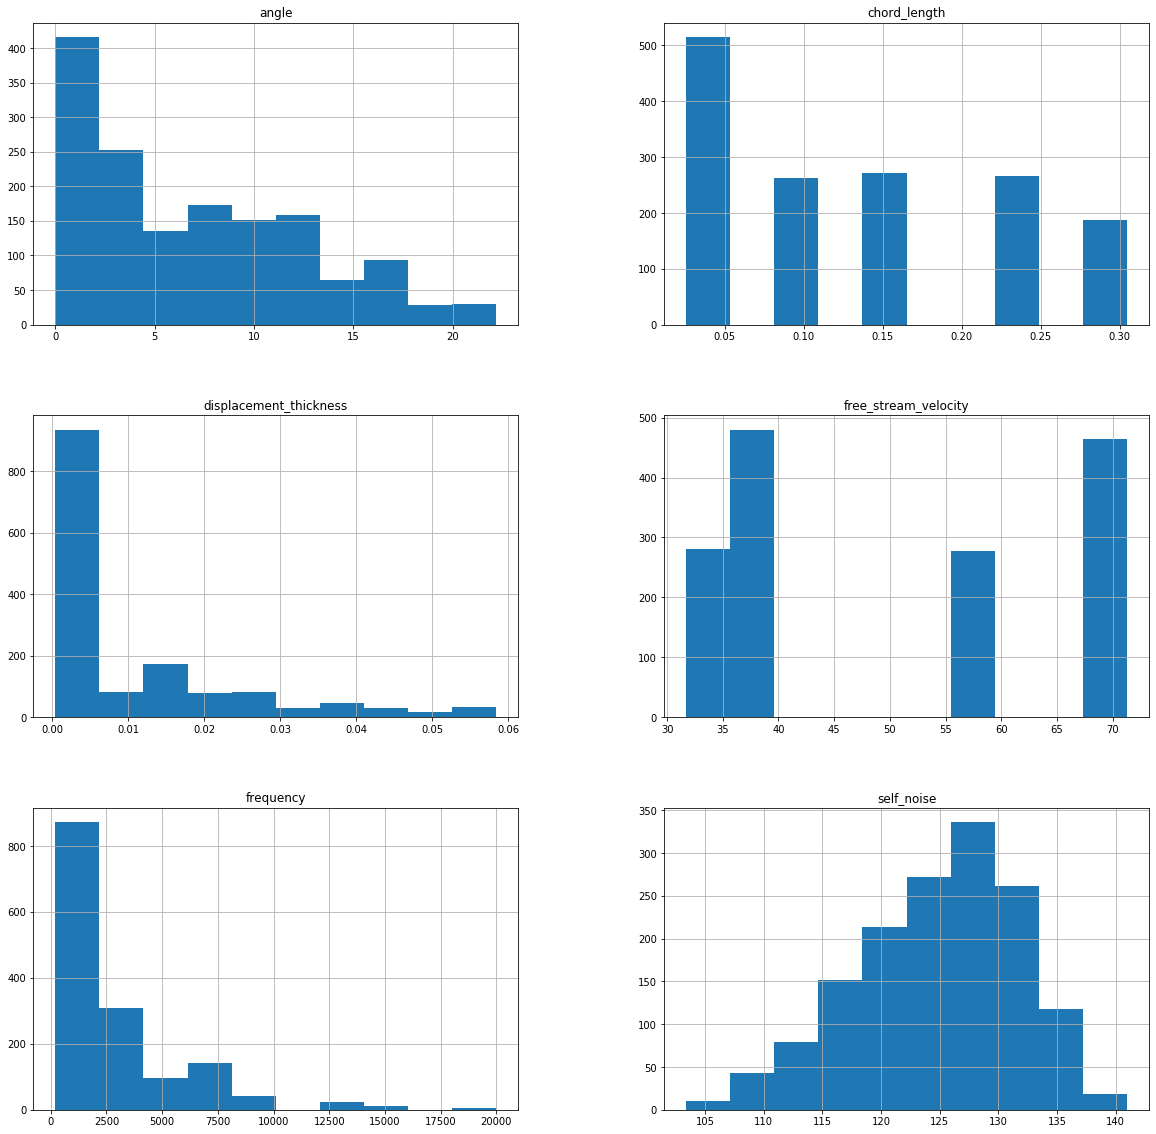

In [164]:
ax3 = noise.hist(figsize=(20,20), bins = 10) # Visualize distributions of each column

- Which variables are approximately normally distributed?

Self Noise appears to be the more normally distributed than the rest of the variables.

- Which variables show strong skew?

angle, displacement thickness, frequency and chord length shows strong skews.

- Make a scatterplot of each feature variable with the target variable "self_noise".

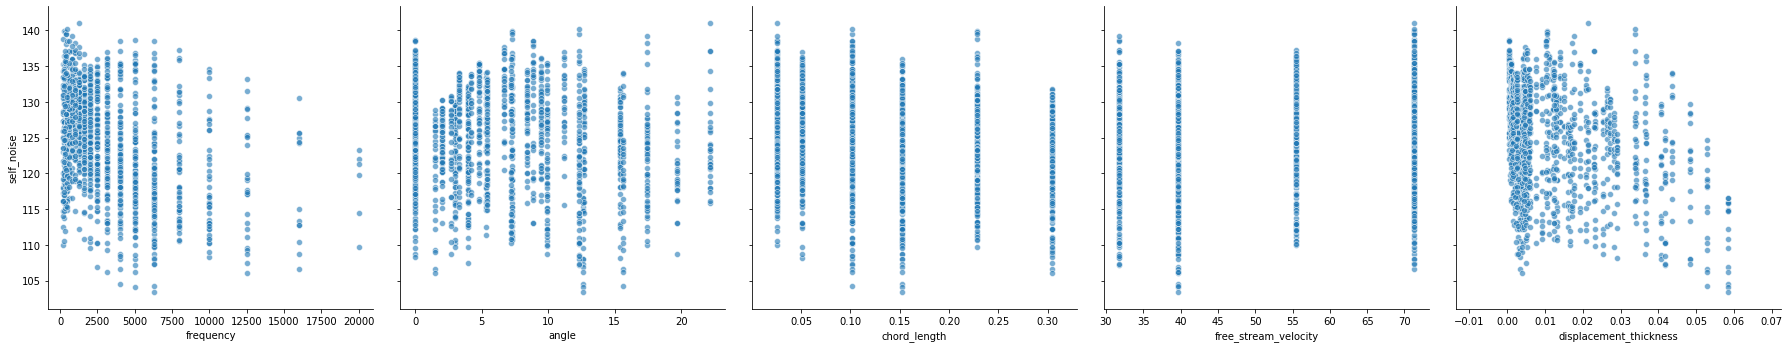

In [165]:
g = sns.pairplot(data=noise,x_vars=noise.drop('self_noise',axis='columns').columns, 
                 y_vars=['self_noise'], plot_kws={'alpha':.6}, height=5)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

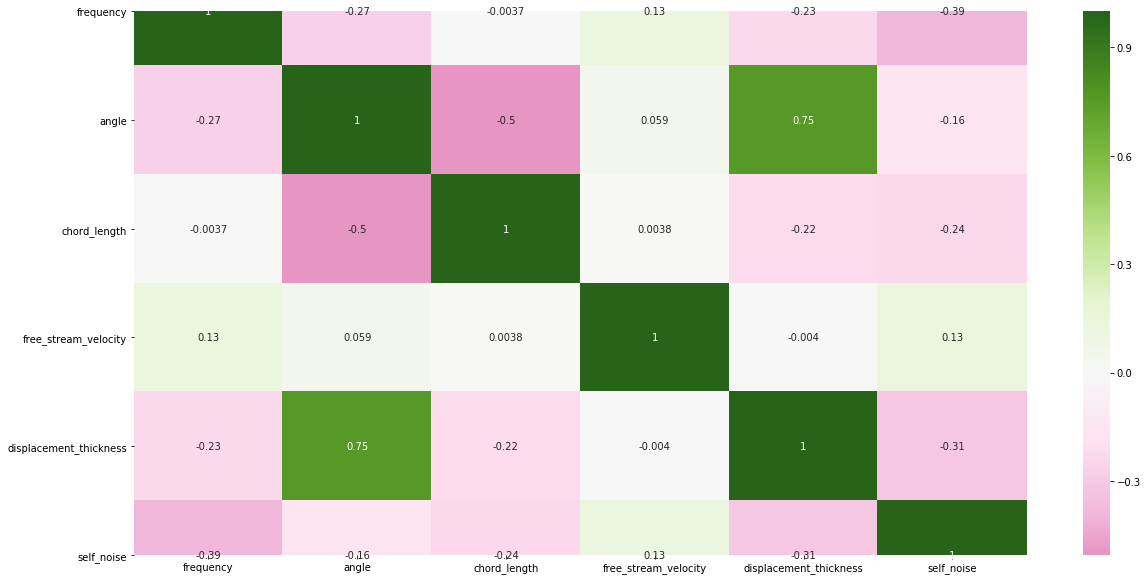

In [166]:
import seaborn as sns

fig, ax5 = plt.subplots(figsize=(20,10)) 
sns.heatmap(noise.corr(), center=0, cmap="PiYG", annot = True, ax = ax5);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Based on the scatter points features appears to have a non-linear relationship with the target self noise. Also
there appears to be strong correlations between self noise and frequence, cord lenth and displacement_thickness


- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature_cols = ['frequency','chord_length','angle','free_stream_velocity','displacement_thickness']
target_col = ['self_noise']

# Create feature and target dataframes
X = noise.loc[:, feature_cols]
y = noise.loc[:, target_col]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, train_size=.70, random_state = 1)

# Creating a linear regression model instance and fitting the training data to it
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluating the model 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing training data to null model/finding R-Squared 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE



Training Data R-Squared: 0.5334675324721334
Test Data R-Squared: 0.46886409442170435
Test Data RMSE: 4.978237387978259
Test Data MAE: 3.8820168120698897


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

This model is peforms better than the null model however could be some room for improvement so bias is high. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test set did not perform as well as the training set which indicates that there is slight variance as well.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say more of a bias problem since the score is .53 where there is only a .07 difference in scorings between the test and training scores.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [168]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
y_train_array = np.array(y_train['self_noise'])
rf.fit(X_train, y_train_array)

y_test_array = np.array(y_test['self_noise'])
print('Training Data R-Squared:', rf.score(X_train, y_train_array))
print('Test Data R-Squared:', rf.score(X_test, y_test_array))


Training Data R-Squared: 0.9890327292504049
Test Data R-Squared: 0.9280611940386851


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

This is a significant improvement on scores where both the traning and test set scores are greater than .90.  The training scores indicate that bias issue has been resolved and the test improvements show a similar score yet the variance difference is roughly the same as the previous test (about a .06 difference).  With increased sample set or cross fold validation we may be able to reduce variance as well.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I am going to work to improve the linear model by adding Polynomials features to the model

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

feature_cols = ['frequency','chord_length','angle','free_stream_velocity','displacement_thickness']
target_col = ['self_noise']

# Create feature and target dataframes
X = noise.loc[:, feature_cols]
y = noise.loc[:, target_col]

pf = PolynomialFeatures(degree=2, include_bias=False)

pf.fit(X)
X_poly = pf.transform(X) 

kf = KFold(10, shuffle=True)
lr_grid = GridSearchCV(estimator=LinearRegression(), param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X_poly,y)
results = lr_grid.cv_results_
print("Train Score: ", results['mean_train_score'])
print("Test Score:", results['mean_test_score'])

Train Score:  [0.64563681]
Test Score: [0.62606748]


- **BONUS:** Keep going! Find ways to make your model better.

In [170]:
# increase the degress to find a better curve
pf = PolynomialFeatures(degree=4, include_bias=False)
pf.fit(X)
X_poly = pf.transform(X) 
lr_grid = GridSearchCV(estimator=LinearRegression(), param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X_poly,y)
results = lr_grid.cv_results_
print("Train Score: ", results['mean_train_score'])
print("Test Score:", results['mean_test_score'])

Train Score:  [0.78781878]
Test Score: [0.74625773]


## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data represents a combination of categorical and continuous data  which helps to determine if individuals credit application should be approved.  The data has been obfuscated in order to hide private/sensitive information.  A model could help to identify credit worthy individuals

In [171]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [172]:
rows,columns = credit.shape
print("Rows: ",rows,", Columns: ", columns)

Rows:  690 , Columns:  16


- Find out what data types are present.

In [173]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
1     690 non-null object
2     690 non-null object
3     690 non-null float64
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null object
8     690 non-null float64
9     690 non-null object
10    690 non-null object
11    690 non-null int64
12    690 non-null object
13    690 non-null object
14    690 non-null object
15    690 non-null int64
16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [174]:
credit = credit.replace({2:{'?':0},14:{'?':0}})

In [175]:
credit = credit.astype({2: 'float64',14:'float64'})

In [176]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
1     690 non-null object
2     690 non-null float64
3     690 non-null float64
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null object
8     690 non-null float64
9     690 non-null object
10    690 non-null object
11    690 non-null int64
12    690 non-null object
13    690 non-null object
14    690 non-null float64
15    690 non-null int64
16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [177]:
credit.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
23,a,27.42,14.500,u,g,x,h,3.085,t,t,1,f,g,120.0,11,+
613,b,19.33,10.915,u,g,c,bb,0.585,f,t,2,t,g,200.0,7,-
257,b,20.00,0.000,u,g,d,v,0.500,f,f,0,f,g,144.0,0,-
482,a,17.33,9.500,u,g,aa,v,1.750,f,t,10,t,g,0.0,10,-
401,b,28.92,0.375,u,g,c,v,0.290,f,f,0,f,g,220.0,140,-


- Find out how many null values there are in each columns.

In [178]:
credit.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [179]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690.000000,690.000000,690
unique,3,NaN,NaN,4,4,15,10,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.019159,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,180.547826,1017.385507,NaN
std,NaN,12.552078,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.970323,5210.102598,NaN
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.440000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,60.000000,0.000000,NaN
50%,NaN,28.170000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,272.000000,395.500000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

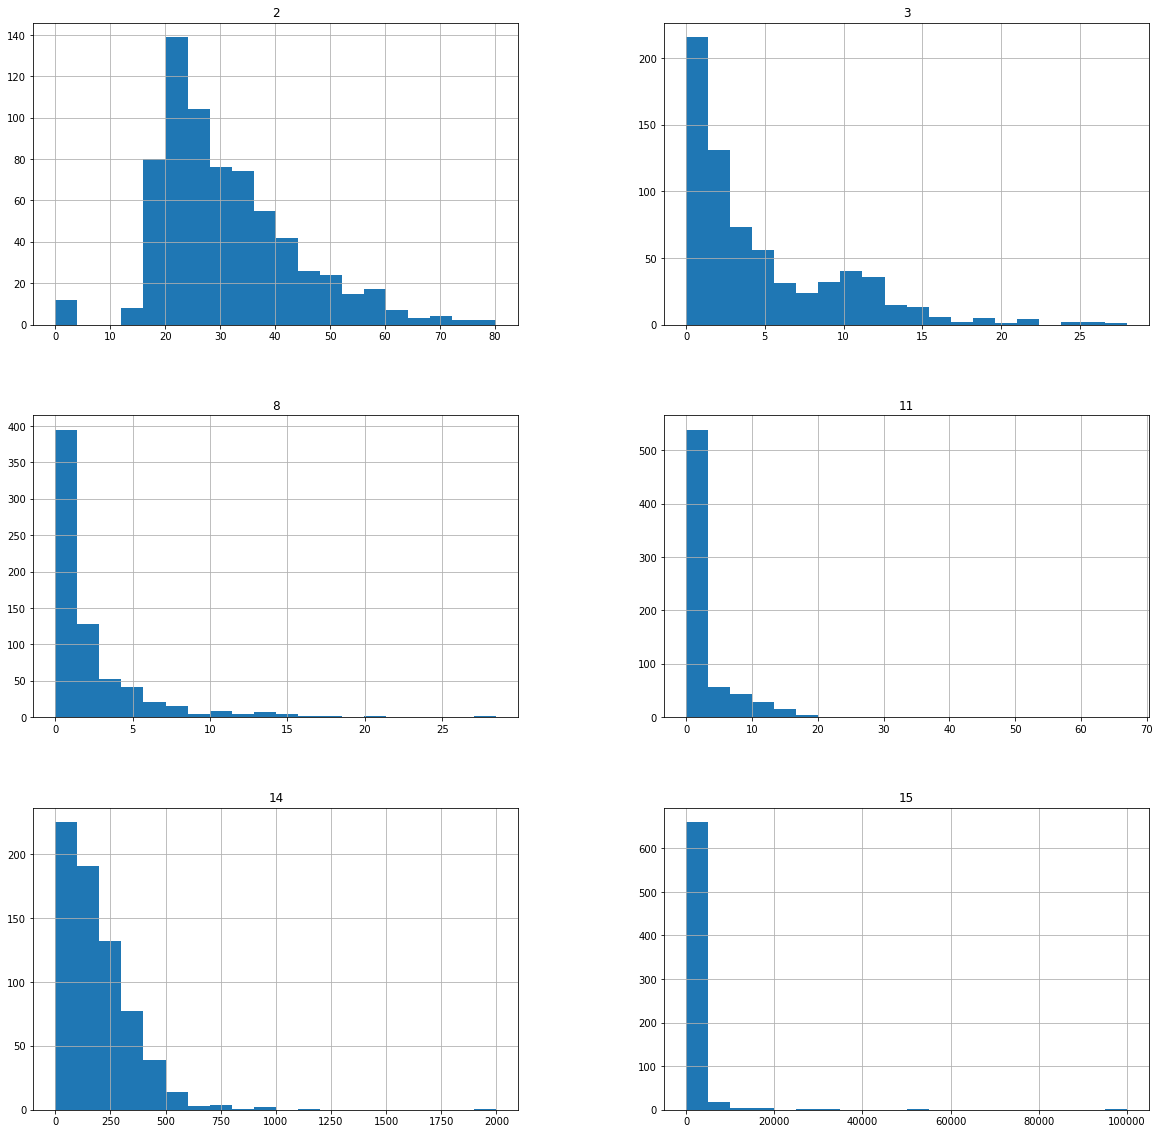

In [180]:
#For continuous data plot distributions
ax3 = credit.hist(figsize=(20,20), bins = 20) # Visualize distributions of each column

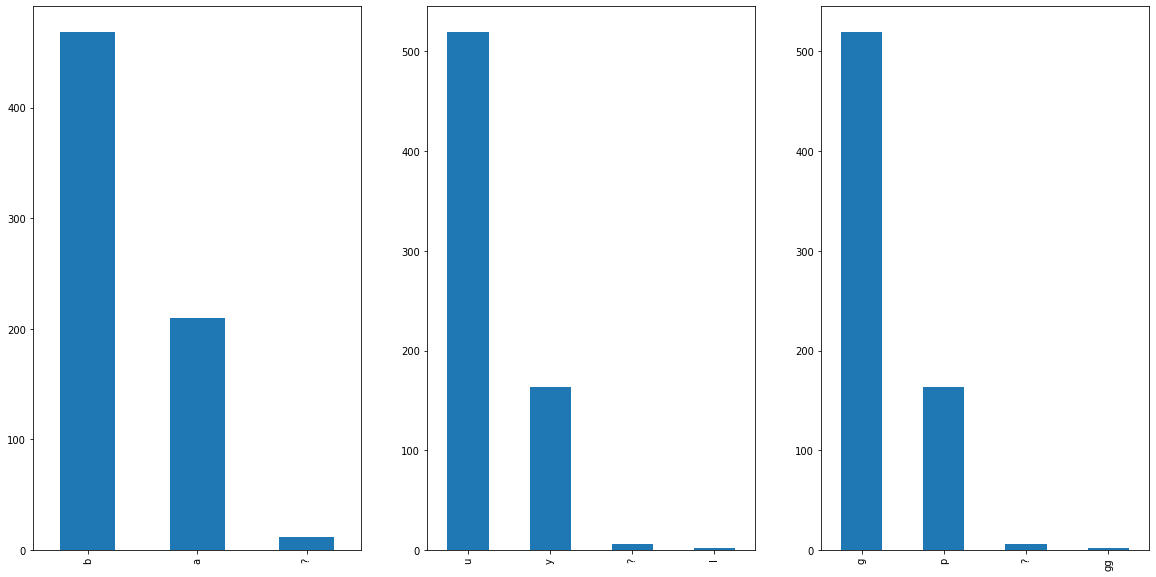

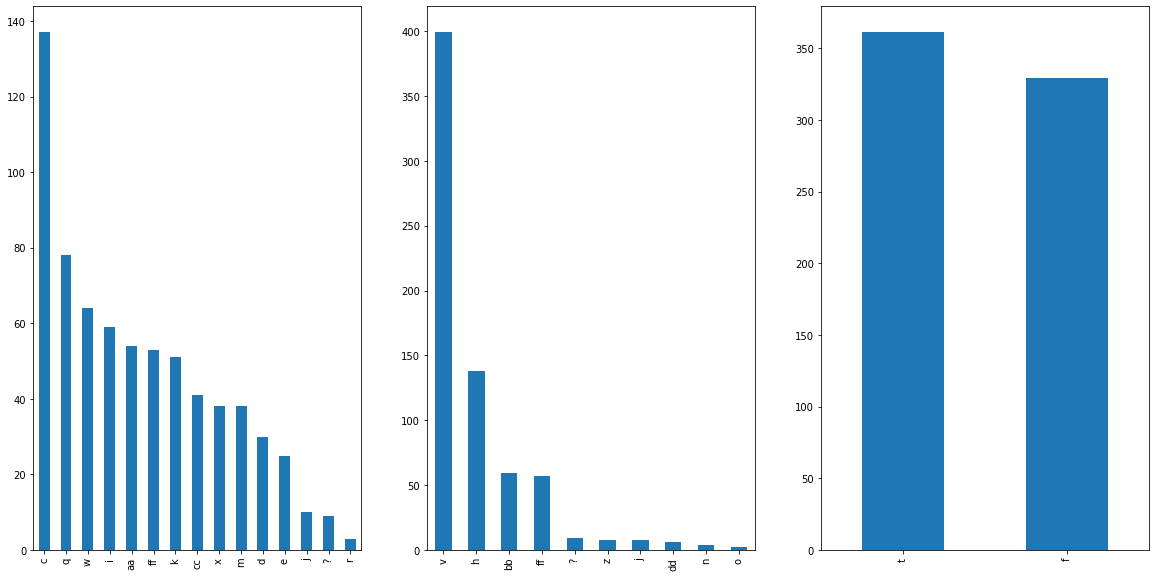

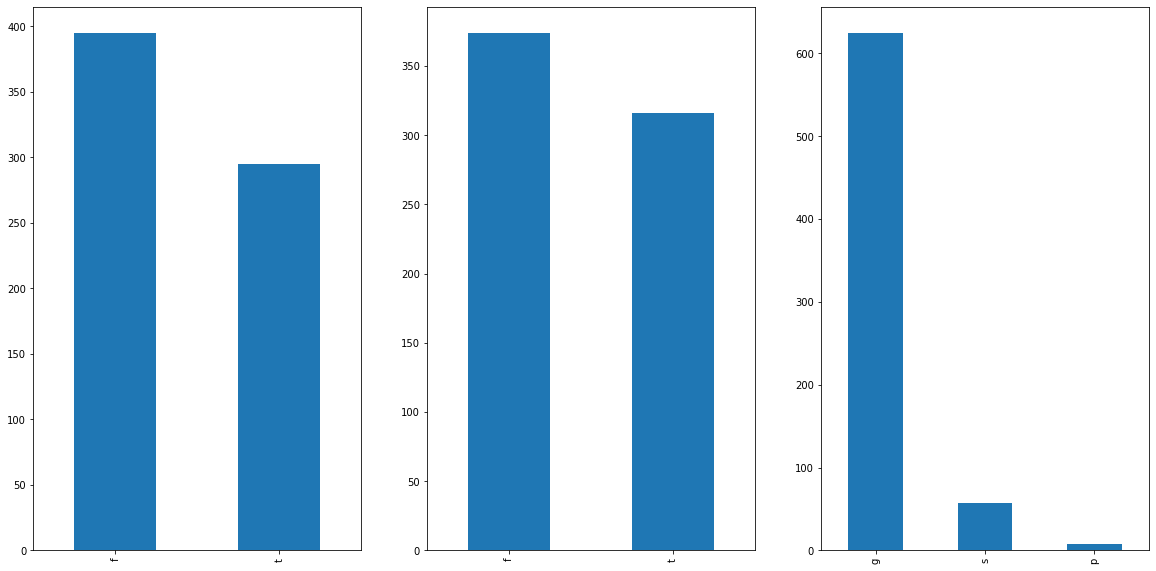

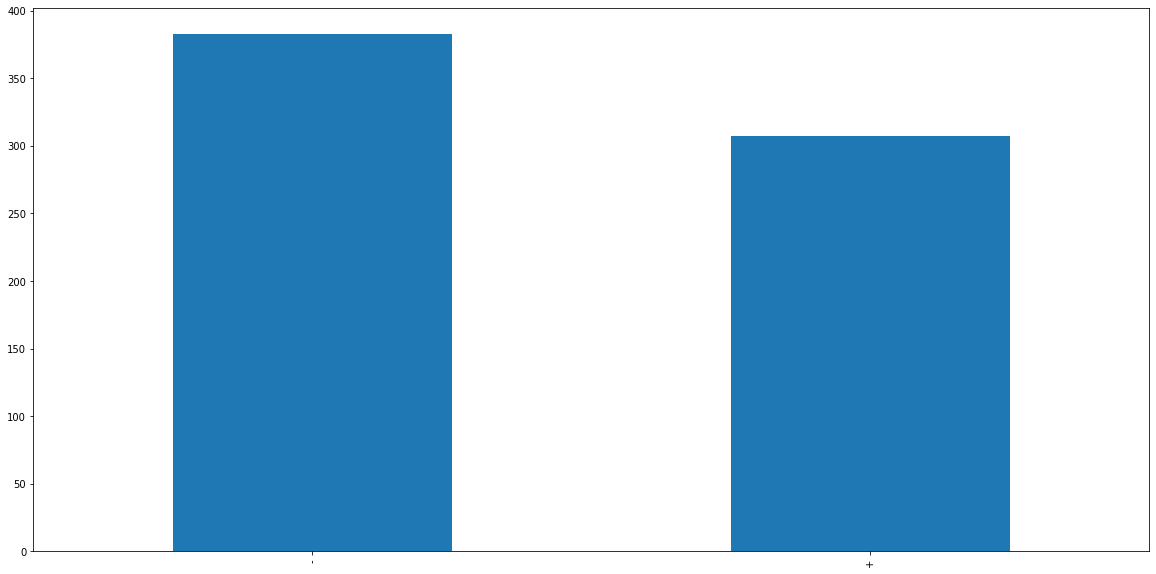

In [181]:
#For categorical data count number of occurences of values

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  figsize=(20, 10))
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3,  figsize=(20, 10))
fig, (ax7, ax8, ax9) = plt.subplots(nrows=1, ncols=3,  figsize=(20, 10))
fig, (ax10) = plt.subplots(nrows=1, ncols=1,  figsize=(20, 10))

credit.loc[:,1].value_counts().plot(kind='bar', ax=ax1)
credit.loc[:,4].value_counts().plot(kind='bar', ax=ax2)
credit.loc[:,5].value_counts().plot(kind='bar', ax=ax3)
credit.loc[:,6].value_counts().plot(kind='bar',ax=ax4)
credit.loc[:,7].value_counts().plot(kind='bar',ax=ax5)
credit.loc[:,9].value_counts().plot(kind='bar',ax=ax6)
credit.loc[:,10].value_counts().plot(kind='bar',ax=ax7)
credit.loc[:,12].value_counts().plot(kind='bar',ax=ax8)
credit.loc[:,13].value_counts().plot(kind='bar',ax=ax9)
credit.loc[:,16].value_counts().plot(kind='bar',ax=ax10)


- Which variables are approximately normally distributed?

Column #2

- Which variables show strong skew?

Columns 1, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 

- Make a scatterplot of each feature variable with the target variable (`16`).

In [182]:
credit = credit.replace({16:{'+':1,'-':0}})
credit = credit.astype({16: 'float64'})

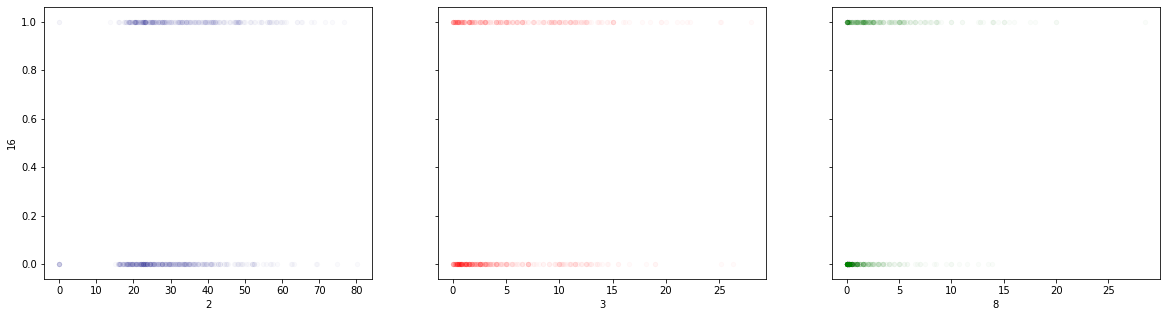

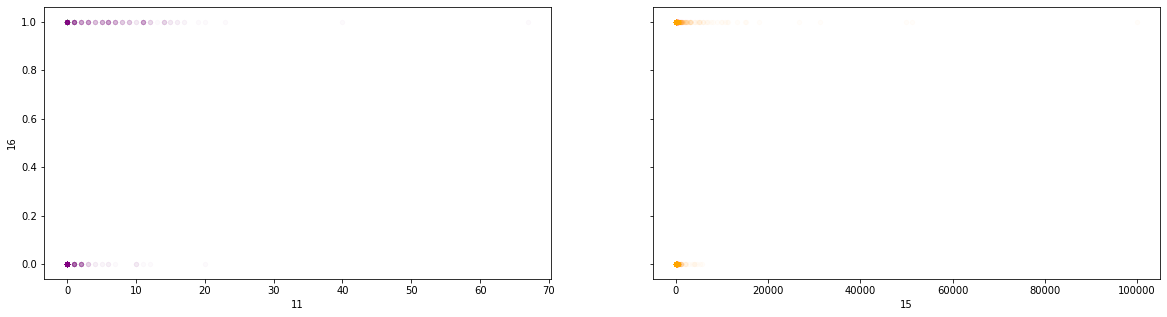

In [183]:
fig, (ax, ax2, ax3) = plt.subplots(nrows=1, ncols=3,  sharey=True, figsize=(20, 5))
fig, (ax4, ax5) = plt.subplots(nrows=1, ncols=2,  sharey=True, figsize=(20, 5))

credit.plot.scatter(x=2, y=16, c="DarkBlue", ax=ax, alpha=.02)
credit.plot.scatter(x=3, y=16, c="Red", ax=ax2, alpha=.02)
credit.plot.scatter(x=8, y=16, c="Green", ax=ax3, alpha=.02)
credit.plot.scatter(x=11, y=16, c="Purple", ax=ax4, alpha=.02)
credit.plot.scatter(x=14, y=16, c="Orange", ax=ax5, alpha=.02)
credit.plot.scatter(x=15, y=16, c="Orange", ax=ax5, alpha=.02)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

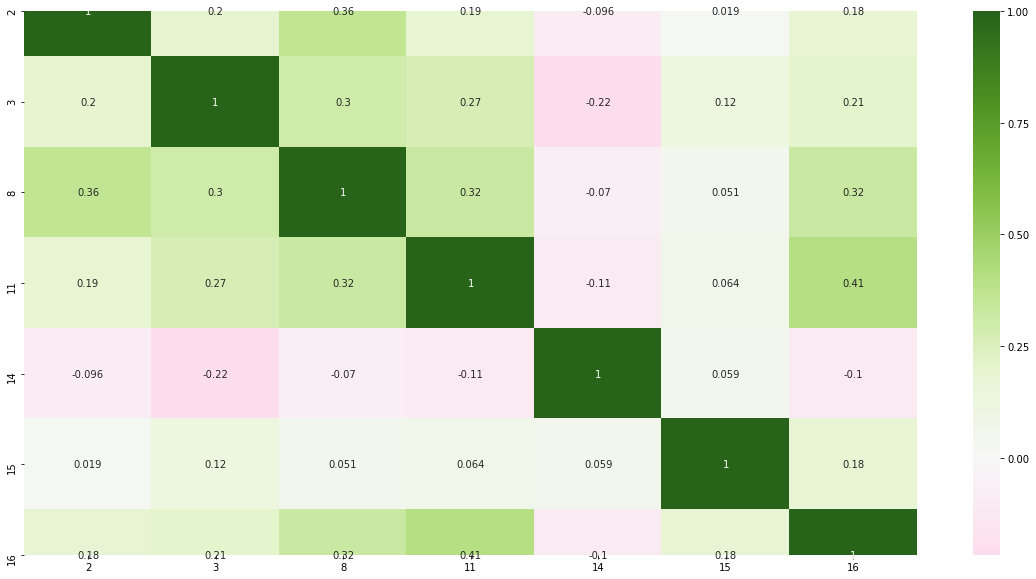

In [184]:
fig, ax5 = plt.subplots(figsize=(20,10)) 
sns.heatmap(credit.corr(), center=0, cmap="PiYG", annot = True, ax = ax5);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Data set has a 0 or 1 outcome so will need to model using Logistic Regression technique.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [185]:
credit.loc[:, 16].value_counts(normalize=True)

0.0    0.555072
1.0    0.444928
Name: 16, dtype: float64

The accuracy of the null model should be .555

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [186]:
#create dummie columns
credit = pd.get_dummies(credit,columns=[1,4,5,6,7,9,10,12,13])
dumm_cols = [col for col in credit_updated.columns if str(col).find("_") > -1]

In [187]:
from sklearn.linear_model import LogisticRegression

# Split the data into feature columns and target column
feature_cols = [2,3,8,11,14,15]
target_col = 16

#add dummy cols to feature cols
feature_cols+=dumm_cols

X = credit.loc[:, feature_cols]
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, train_size=.70, random_state = 3)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_train, y_train)

0.9004149377593361

In [188]:
lr.score(X_test, y_test)

0.7971014492753623

In [189]:
y.value_counts(normalize=True)

0.0    0.555072
1.0    0.444928
Name: 16, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training model performed very well against the null model (.900 vs .555).  The bias isn't very high but there is room for improvement given the score.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test did not perform as well as the training model did against the against the null model which indicates model may be slightly overfitted due to a higer variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Variance is a bit high in this case (difference of .11) where as bias is a .90 (could have some improvements but not as much needed than for variance). So variance appears to be a larger problem.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [190]:
# Instantiate model with 100 decision trees
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 3)
# Train the model on training data
y_train_array = np.array(y_train)
rf.fit(X_train, y_train_array)

y_test_array = np.array(y_test)
print('Training Data R-Squared:', rf.score(X_train, y_train_array))
print('Training Data R-Squared:', rf.score(X_test, y_test_array))

Training Data R-Squared: 1.0
Training Data R-Squared: 0.8260869565217391


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

There is a significantly higher difference in the test and training scores of this model (.18) vs the differences of the same scores in the linear model (.11) which indicates this model is more overfitted than the previous model. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

Let's try to reduce variance of the logistic regression by doing more train test splits using cross validation

In [191]:
lr = LogisticRegression(solver='liblinear')
kf = KFold(20, shuffle=True)
lr_grid = GridSearchCV(estimator=lr, param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X,y)
results = lr_grid.cv_results_
print("Train Score: ", results['mean_train_score'])
print("Test Score:", results['mean_test_score'])


Train Score:  [0.88367611]
Test Score: [0.85797101]


Model is less overfitted but variance is reduced which I think is an improvement overall for a flexible model

- **BONUS:** Keep going! Find ways to make your model better.

Let's try improving Random Forest model also using classification.

In [192]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
kf = KFold(10, shuffle=True)
lr_grid = GridSearchCV(estimator=rf, param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X,y)
results = lr_grid.cv_results_
print("Train Score: ", results['mean_train_score'])
print("Test Score:", results['mean_test_score'])

Train Score:  [1.]
Test Score: [0.86666667]
